In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple, Callable
import os
from sklearn.utils import Bunch


In [4]:
# Load the dataset
# here is the url for the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"

# I was unable to load dataset without downloading and using the file path
file_path = "/Users/saadb/Downloads/bike+sharing+dataset/hour.csv"
data = pd.read_csv(file_path)

# Select the relevant features and target
features = ["season", "temp", "hum", "windspeed", "hr"]
bike = Bunch(
    data=data[features],  # Selected features
    target=data["cnt"],  # Target variable
    feature_names=features,
    target_names=["cnt"]
)

In [5]:
bike.data.head()

,season,temp,hum,windspeed,hr
0,1,0.24,0.81,0.0,0
1,1,0.22,0.80,0.0,1
2,1,0.22,0.80,0.0,2
3,1,0.24,0.75,0.0,3
4,1,0.24,0.75,0.0,4


In [9]:
bike.target.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [11]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
          instant        season            y

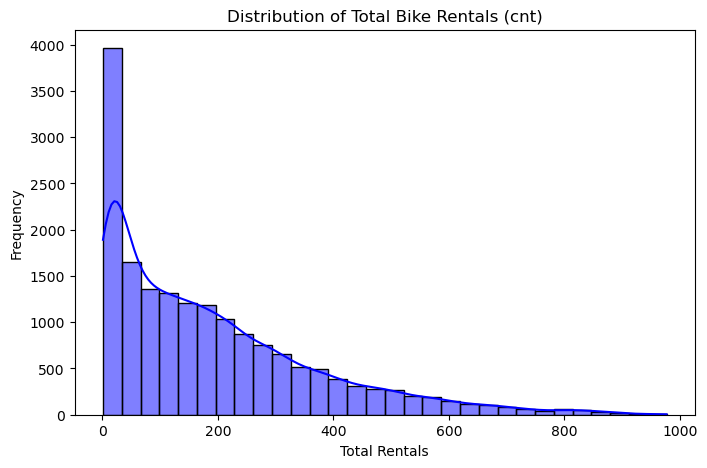

In [13]:
# Distribution of bike rentals
plt.figure(figsize=(8, 5))
sns.histplot(data['cnt'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()

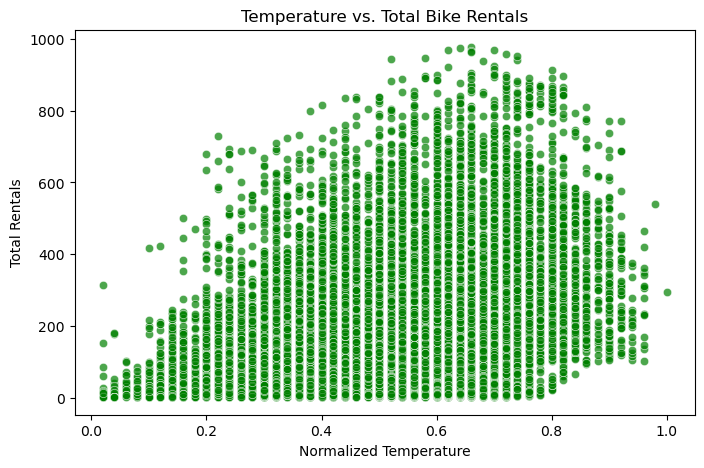

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['temp'], y=data['cnt'], alpha=0.7, color='green')
plt.title('Temperature vs. Total Bike Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.show()

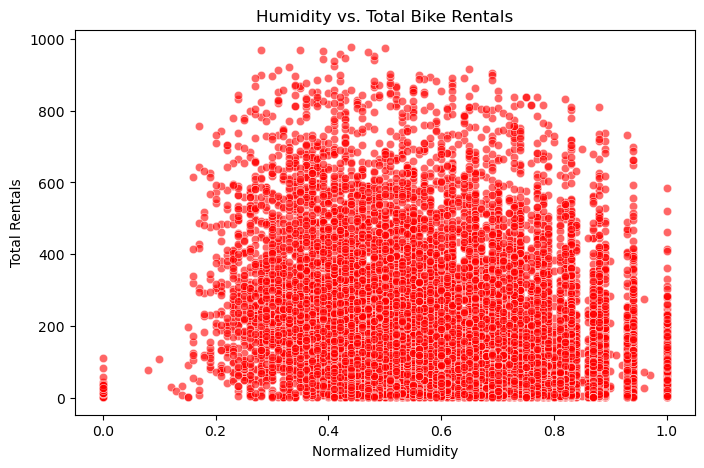

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['hum'], y=data['cnt'], alpha=0.6, color='red')
plt.title('Humidity vs. Total Bike Rentals')
plt.xlabel('Normalized Humidity')
plt.ylabel('Total Rentals')
plt.show()

In [19]:
def get_train_valid_test_data(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray]:
    # Split data into training and testing
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.8, random_state=42)
    # Split training data into training and validation
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=0.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [21]:
def get_preprocessed_data(data: pd.DataFrame, features: list, target: str) -> Tuple[np.ndarray]:
    # features and target
    X = data[features].values
    y = data[target].values
    
    # Split the data
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)
    scaler = StandardScaler()
    scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)
    X_trn = np.hstack([np.ones((X_trn.shape[0], 1)), X_trn])
    X_vld = np.hstack([np.ones((X_vld.shape[0], 1)), X_vld])
    X_tst = np.hstack([np.ones((X_tst.shape[0], 1)), X_tst])

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

target = "cnt"

X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data(data, features, target)

# classify bike rentals into low and high
y_trn_binary = (y_trn > 200).astype(int)
y_vld_binary = (y_vld > 200).astype(int)
y_tst_binary = (y_tst > 200).astype(int)

# logistic regression model
model = LogisticRegression(max_iter=10000, random_state=42)

# Train the model
model.fit(X_trn, y_trn_binary)

y_vld_pred = model.predict(X_vld)
y_tst_pred = model.predict(X_tst)

# Validation accuracy
validation_accuracy = accuracy_score(y_vld_binary, y_vld_pred)
print(f"Validation Accuracy: {validation_accuracy:.3f}")

# Test accuracy
test_accuracy = accuracy_score(y_tst_binary, y_tst_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

# classification report
print("Report:")
print(classification_report(y_tst_binary, y_tst_pred))

Validation Accuracy: 0.754
Test Accuracy: 0.758
Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2213
           1       0.68      0.63      0.65      1263

    accuracy                           0.76      3476
   macro avg       0.74      0.73      0.73      3476
weighted avg       0.75      0.76      0.76      3476



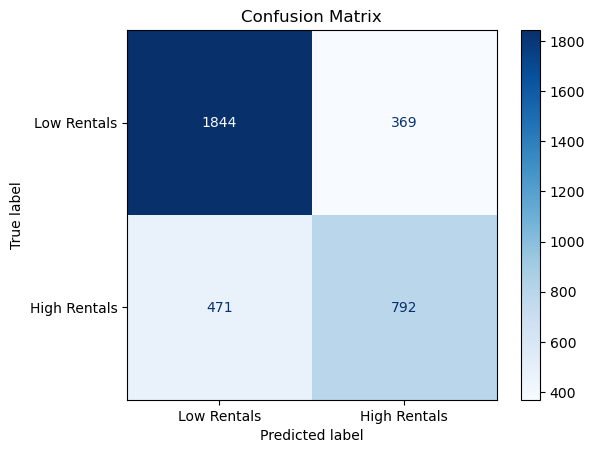

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predictions for test
y_tst_pred = model.predict(X_tst)

# Create matrix
conf_matrix = confusion_matrix(y_tst_binary, y_tst_pred)

# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Low Rentals", "High Rentals"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [27]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_trn, y_trn) 

# Predict on validation and test sets
y_vld_pred = linear_model.predict(X_vld)
y_tst_pred = linear_model.predict(X_tst)

# Mean Squared Error and R-squared
validation_mse = mean_squared_error(y_vld, y_vld_pred)
mse = mean_squared_error(y_tst, y_tst_pred)
validation_r2 = r2_score(y_vld, y_vld_pred)
r2 = r2_score(y_tst, y_tst_pred)
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

validation_mse, validation_r2

MSE: 20834.35
R2 Score: 0.34


(21619.662553380516, 0.3368397892806386)